In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from src.model import *
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [66]:
imbruvica = clean_data('data/imbruvica_prescrib_npi_summary.csv')
imbruvica.head()

,npi,generic_drug_cost,mapd_drug_cost,pdp_drug_cost,lis_drug_cost,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,er_opioid_drug_cost,er_opioid_prescriber_rate,...,antibiotic_drug_cost,antibiotic_bene_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_nondual_count,beneficiary_average_risk_score,zip_density,total_income_per_return,high_prescrib
0,1114922432,43286.13,727447.50,1071069.85,472320.34,1326197.01,170.0,6517.65,885.460000,10.588235,...,818.02,22.0,163.0,89.0,196.0,215.0,1.9098,2108.081732,0.025356,0
1,1922086412,31903.24,505213.11,525494.39,336735.17,693972.33,83.0,4003.16,2362.217576,12.879391,...,301.67,18.0,94.0,51.0,129.0,124.0,2.0691,2108.081732,0.025356,0
2,1104804798,99432.11,401638.93,1097516.89,271426.02,1227729.80,368.0,13397.48,1652.860000,13.858696,...,3105.11,65.0,347.0,104.0,386.0,399.0,1.5924,2108.081732,0.025356,0
3,1477558880,85925.27,1108102.11,970848.53,542085.48,1536865.16,232.0,25083.83,1752.960000,10.775862,...,616.20,32.0,112.0,73.0,158.0,133.0,2.6162,2108.081732,0.025356,1
4,1124023452,68936.55,512911.14,1903057.25,821507.92,1594460.47,273.0,21528.92,2785.590000,17.948718,...,124.85,10.0,113.0,85.0,166.0,153.0,2.3698,2108.081732,0.025356,0


In [67]:
X, y = get_Xy(imbruvica, 'high_prescrib')

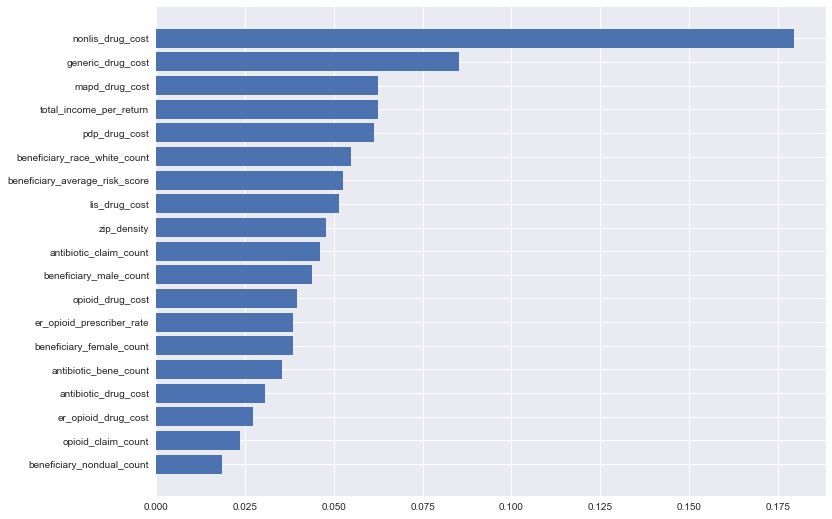

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

plot_feature_importances(gbc, X)

In [69]:
cross_val_score(gbc, X, y=y).mean()

0.75834305378609324

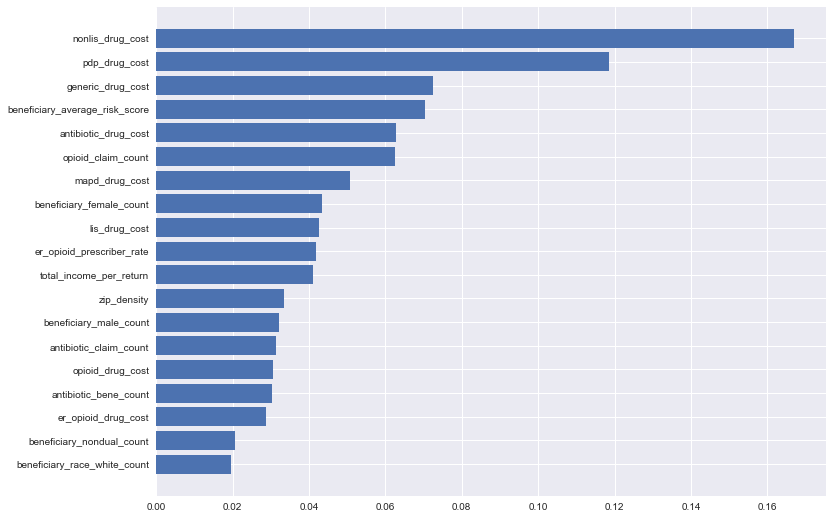

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

plot_feature_importances(gbc, X)

## Add in EA_HP data

In [127]:
EA_HP = pd.read_csv('data/imbruvica_EA_HP.txt', delimiter='\t')
EA_HP = EA_HP[['npi','xalkori_EA', 'gilotrif_EA',
       'mekinist_EA', 'zykadia_EA', 'imbruivca_EA', 'nivo_EA', 'xalkori_HP',
       'gilotrif_HP', 'mekinist_HP', 'zykadia_HP', 'nivo_HP', 'xalkori_HP2',
       'gilotrif_HP2']]
EA_HP.head()

,npi,xalkori_EA,gilotrif_EA,mekinist_EA,zykadia_EA,imbruivca_EA,nivo_EA,xalkori_HP,gilotrif_HP,mekinist_HP,zykadia_HP,nivo_HP,xalkori_HP2,gilotrif_HP2
0,1033101068,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1114922432,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1073841938,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1194784207,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1134116262,0,0,0,0,1,0,0,0,0,0,0,0,0


In [128]:
imbruvica = clean_data('data/imbruvica_prescrib_npi_summary.csv')
imbruvica_EA_HP = pd.merge(imbruvica, EA_HP, on='npi', how='left')

X, y = get_Xy(imbruvica_EA_HP, 'high_prescrib')

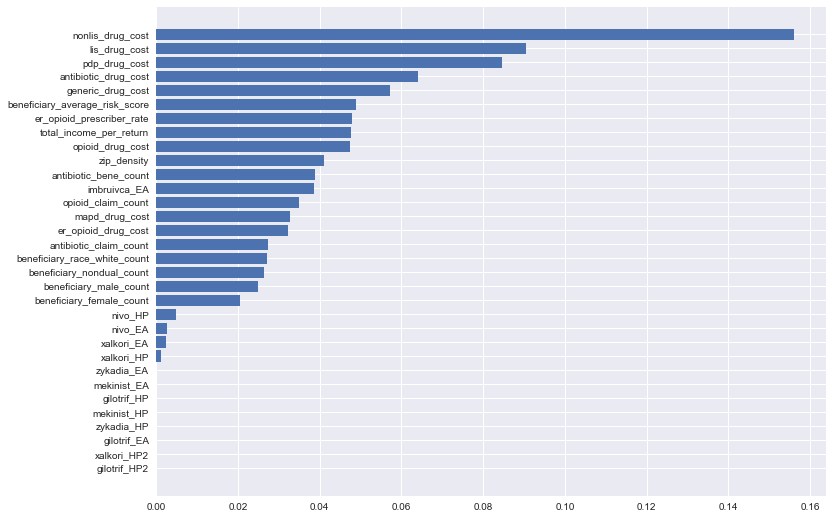

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

plot_feature_importances(gbc, X)

In [130]:
cross_val_score(gbc, X, y=y, cv=5).mean()

0.76829499546541347

In [139]:
# GridSearch RF
param_grid_rf = {'n_estimators': [10, 100, 500, 1000],
              'max_features': ['auto', 'log2', None],
              'max_depth': [None, 3, 6, 9, 12],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]
             }

rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, param_grid=param_grid_rf)
rf_clf.fit(X, y)
rf_clf.best_params_

KeyboardInterrupt: 

In [140]:
# GridSearch RF slim
param_grid_rf_slim = {'n_estimators': [10, 100, 200, 300],
              'max_features': ['auto'],
              'max_depth': [6, 9, 12, 15],
              'min_samples_split': [2, 6],
              'min_samples_leaf': [2, 3]
             }

rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, param_grid=param_grid_rf_slim)
rf_clf.fit(X, y)
rf_clf.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [143]:
print(rf_clf.best_params_, rf_clf.best_score_)

{'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200} 0.769576379974


In [ ]:
# GridSearch GBC
param_grid_gbc = {'n_estimators': [100, 400, 700],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'max_features': ['auto', 'log2', None],
                  'max_depth': [3, 6, 9, 12],
                  'min_samples_split': [2, 4, 6],
                  'min_samples_leaf': [1, 2, 3],
                  'subsample': [1.0, 0.7]
             }

gbc = GradientBoostingClassifier()
gbc_clf = GridSearchCV(gbc, param_grid=param_grid_gbc)
gbc_clf.fit(X, y)

In [147]:
# GridSearch GBC slim
param_grid_gbc_slim = {'n_estimators': [400, 700],
                  'learning_rate': [0.01, 0.001],
                  'max_features': ['auto', 'log2'],
                  'max_depth': [6],
                  'min_samples_split': [2, 4],
                  'min_samples_leaf': [2],
                  'subsample': [0.7]
             }

gbc = GradientBoostingClassifier()
gbc_clf = GridSearchCV(gbc, param_grid=param_grid_gbc_slim)
gbc_clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [400, 700], 'learning_rate': [0.01, 0.001], 'max_features': ['auto', 'log2'], 'max_depth': [6], 'min_samples_split': [2, 4], 'min_samples_leaf': [2], 'subsample': [0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [146]:
print(gbc_clf.best_params_, gbc_clf.best_score_)

{'learning_rate': 0.01, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 0.7} 0.774069319641


In [148]:
print(gbc_clf.best_params_, gbc_clf.best_score_)

{'learning_rate': 0.01, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400, 'subsample': 0.7} 0.775032092426


In [121]:
from sklearn.linear_model import LogisticRegression

In [134]:
lm = LogisticRegression(C=0.01)
cross_val_score(lm, X, y=y, cv=5).mean()

0.72977471349657841

In [ ]:
# Having trouble figuring out which drugs would be good to influence prescribing behavior
# Cluster the most similar drugs and see whether these have more influence than others

# Cluster doctors based on their prescribing behavior for 100s of drugs